### Context
+ According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
+ id: unique identifier
+ gender: "Male", "Female" or "Other"
+ age: age of the patient
+ hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
+ heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
+ ever_married: "No" or "Yes"
+ work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
+ Residence_type: "Rural" or "Urban"
+ avg_glucose_level: average glucose level in blood
+ bmi: body mass index
+ smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
+ stroke: 1 if the patient had a stroke or 0 if not

+ Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# Importing some basic libraries for exploring and visualizing the dataset.
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import luxwidget

# Importing library for balancing the data.
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Importing libraries for splitting and scaling the data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing machine learning libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Colleecting the data.

collected_dataset = 'C:/Users/ARNAB PRIYANKA/Downloads/Analytics EDU/Projects/Data/healthcare-dataset-stroke-data.csv'

In [3]:
# Loading the data.

df = pd.read_csv(collected_dataset)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis using pandas_profiling

In [5]:
# Using Pandas Profiling fearure we can do all kind EDA and basic visualization also.

pp.ProfileReport(df)

### Treating missing values

In [6]:
df.fillna(value = df['bmi'].median(), inplace = True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
df.drop(columns = 'id', inplace = True)
d = df[df['gender'] == 'Other'].index
df.drop(d, inplace = True)

### Visualizing using Lux

In [8]:
!jupyter nbextension enable --py luxwidget

Enabling notebook extension luxwidget/extension...
      - Validating: ok


+ Lux is a latest visualization library in python. With the help lux we can make an automatic visualization and it is an attractive and informative visualization library. For using lux we don't need to import matplotlib.

+ Here, we can see there are three tabs which are Correlation, Distribution and Occurrence. Correlation is showing correlation between each numerical features. Distribution is showing distribution of each numerical features. Occurrence is showing count of all integer data type fearures.

In [9]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

+ Here, I have performed on some features and we can see two tabs which are Enhance, Filter. Enhance is showing based on a specific feature find all other features. Filter is filtering on a specific feature with help all categories.

In [11]:
df.intent = ['gender']
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df.intent = ['hypertension']
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
df.set_intent(['ever_married'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
df.set_intent(['smoking_status'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
df.set_intent(['stroke'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df.set_intent(['heart_disease'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
df.set_intent(['age'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
df.set_intent(['avg_glucose_level'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
df.set_intent(['bmi'])
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Seaborn Distplot

+ With the help of dist plot we can find the distribustion of each numerical feature.

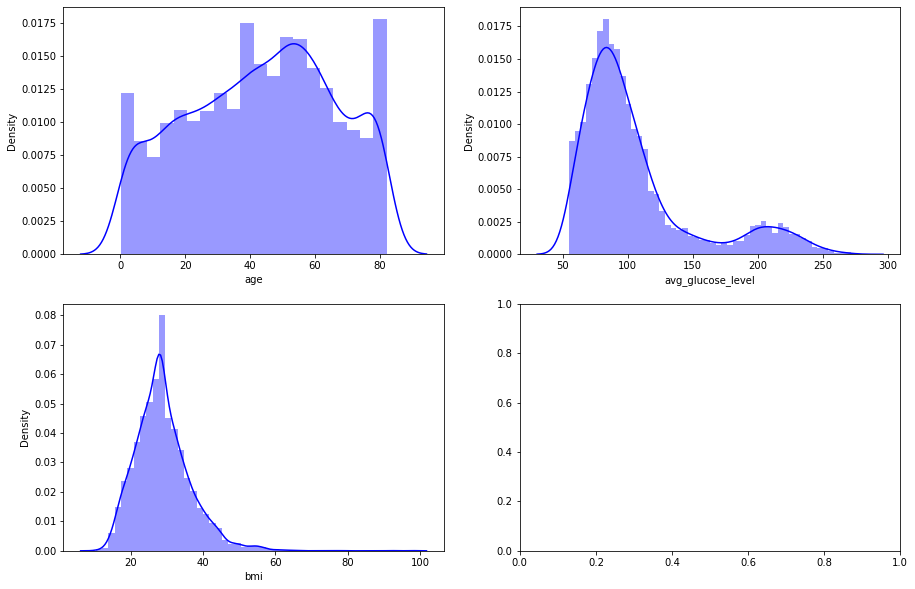

In [8]:
fig,ax = plt.subplots(2,2, figsize=(15 ,10))  
sns.distplot(df['age'], ax = ax[0,0], color = 'b') 
sns.distplot(df['avg_glucose_level'], ax = ax[0,1], color = 'b')
sns.distplot(df['bmi'], ax = ax[1,0], color = 'b')
plt.show()

### Seaborn Violinplot

+ With the help of violinplot we can see the distribution of specific features in a violin pattern.

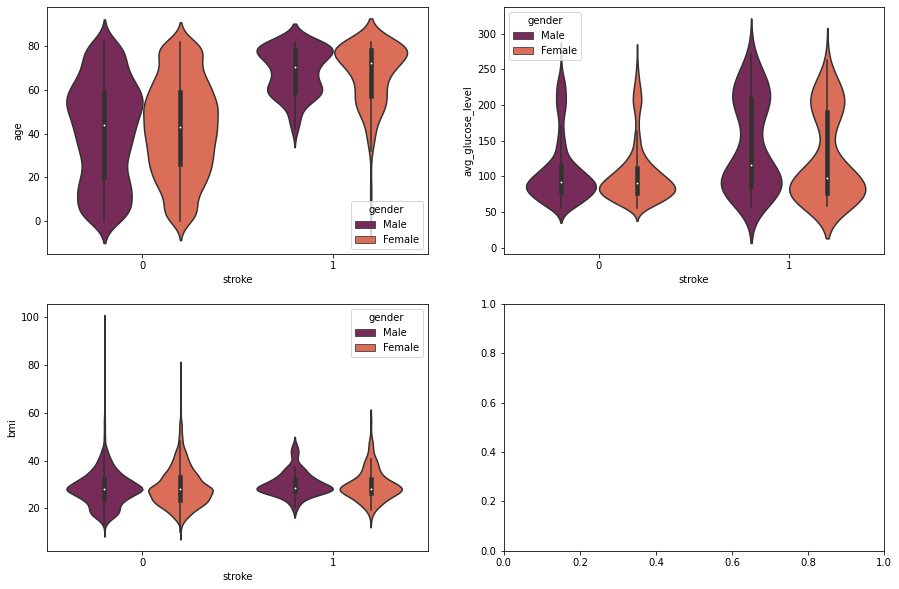

In [10]:
fig,ax = plt.subplots(2,2, figsize=(15,10))  # 'ax' has references to all the four axes
sns.violinplot(x = 'stroke', y = 'age', hue = 'gender', palette = 'rocket', data = df, ax = ax[0,0]) 
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', hue = 'gender', palette = 'rocket',data = df, ax = ax[0,1])
sns.violinplot(x = 'stroke', y = 'bmi', hue = 'gender', palette = 'rocket', data = df, ax = ax[1,0]) 
plt.show()

### Seaborn Pairplot

+ With the help of pair plot we can find a basic scatter plot of each numerical feature and from here we get basic idea of data.

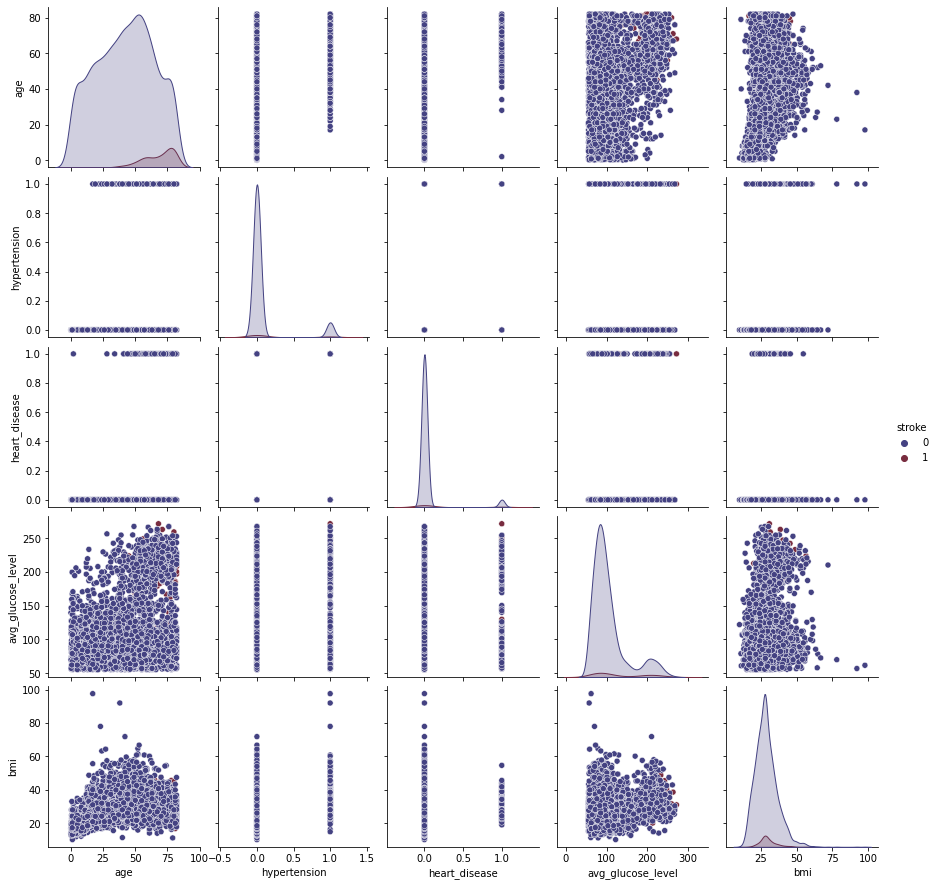

In [14]:
sns.pairplot(df, hue = 'stroke', palette = 'icefire');
plt.show()

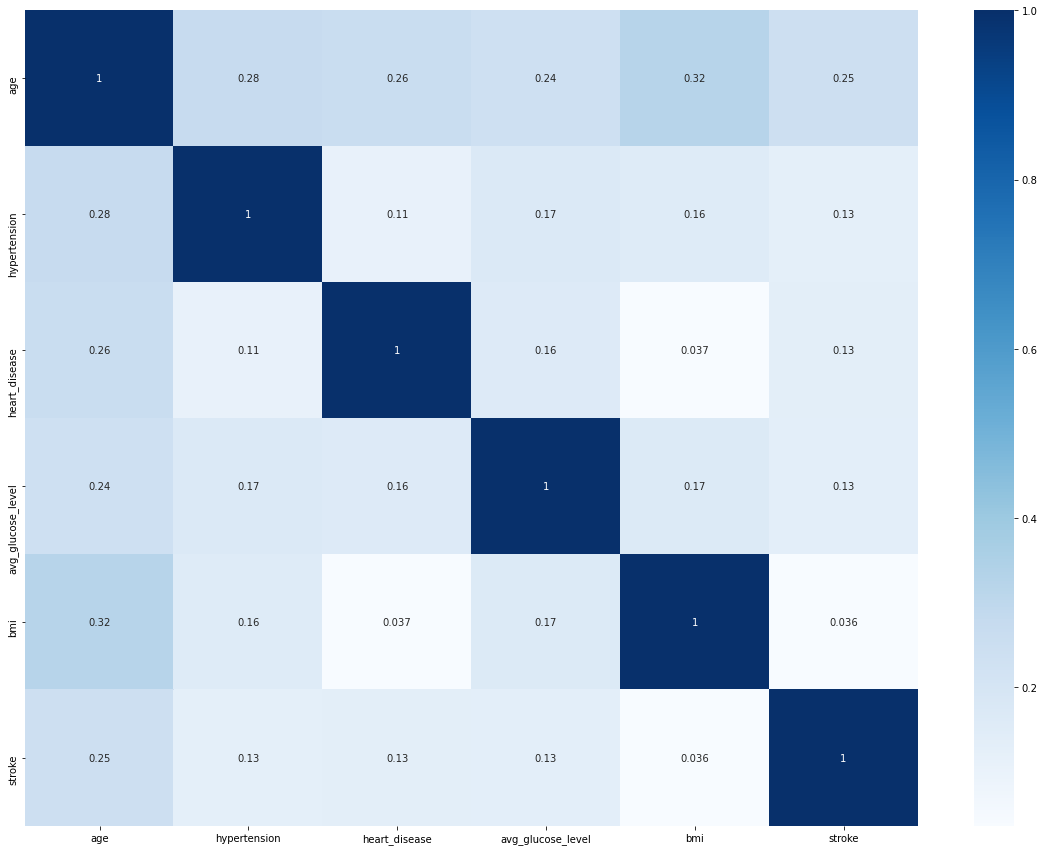

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 15))
sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "Blues");

+ Here, I performed the correlation analysis for all the numerical features including qualitative and quantitative features. From the above correlation plot, I found there were several features have strong positive correlation relationships. The strongest positive correlation relationship is between the "age" and "bmi", which means that a higher if age increase then bmi will also be increased. Apart from that there are some other features which are highly correlated with "age" which are "stroke", "heart_disease", "hypertension", "avg_glucose_level".

### Seaborn Boxplot

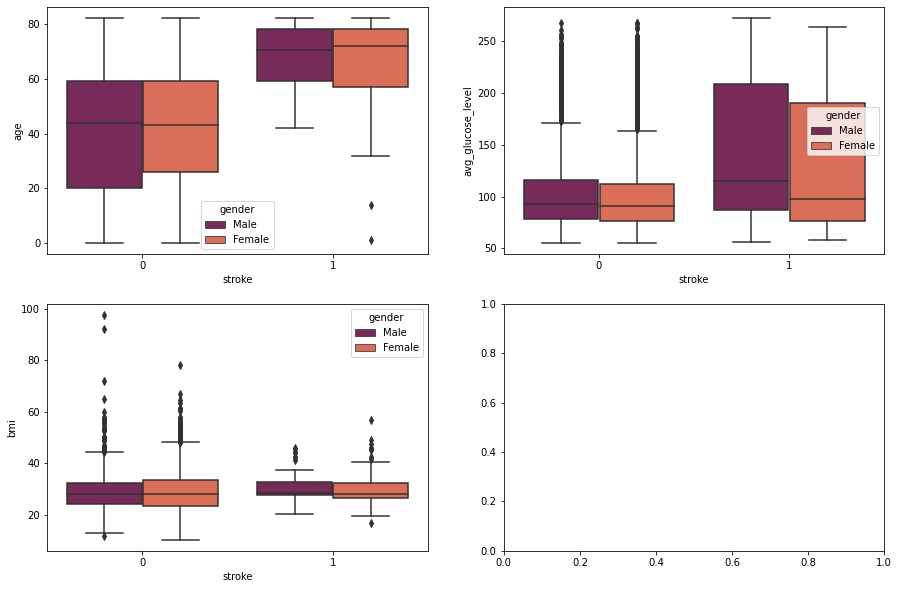

In [9]:
fig,ax = plt.subplots(2,2, figsize=(15,10))  # 'ax' has references to all the four axes
sns.boxplot(x = df['stroke'], y = df['age'], hue = df['gender'], palette = 'rocket', ax = ax[0,0]) 
sns.boxplot(x = df['stroke'], y = df['avg_glucose_level'], hue = df['gender'], palette = 'rocket', ax = ax[0,1])
sns.boxplot(x = df['stroke'], y = df['bmi'], hue = df['gender'], palette = 'rocket', ax = ax[1,0]) 
plt.show()

+ From box plot we can understand that if age is more than 60 then chance of stroke is higher than below age of 60 and it is applicable for male and female and If avg_glucose_level is high then chance of stroke is also high for male and female but male have slightly higher than female.

## Feature Engineering

In [21]:
# Here, I applied different types of encoding.

def encoding(data, feature):
    
    data = data.copy()
    
    # One-Hot Encoding
    dummies = pd.get_dummies(data[feature], prefix = feature)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop(feature, axis = 1)
    
    #Binary Encoding
    data['gender'] = data['gender'].replace({'Female' : 0, 'Male' : 1})
    data['ever_married'] = data['ever_married'].replace({'No' : 0, 'Yes' : 1})
    data['Residence_type'] = data['Residence_type'].replace({'Rural' : 0, 'Urban' : 1})
    
    #Lebel Encoding
    lebels = {'smokes' : 1, 'formerly smoked' : 2, 'never smoked' : 3, 'Unknown' : 4}
    data['smoking_status_lebels'] = data['smoking_status'].map(lebels)
    data = data.drop(columns = 'smoking_status', axis = 1)
    
    return data

columns = ['work_type']
df1 = encoding(df, columns)

In [22]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_lebels
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,2
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,3
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,3
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,3


In [23]:
x = df1.drop('stroke', axis = 1)
y = df1['stroke']

+ My target feature is imbalanced that's why I made it balanced using "Random Over Sampler". If I don't make it balanced data then my model could give biased output. We can see also before and after applting it how the dataset is changed in shape. 

In [24]:
os = RandomOverSampler(sampling_strategy = 1)
x_ros, y_ros = os.fit_resample(x, y)
print(x_ros.shape, y_ros.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))
x_ros = pd.DataFrame(x_ros)
y_ros = pd.DataFrame(y_ros)

(9720, 14) (9720,)
Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({1: 4860, 0: 4860})


In [25]:
# Here, I splitted the dataset into 75% of training and 25% of testing. I applied "Satandard Scaler" for scalling the data.

def feature_scalling(data):
    #Split data into x and y
    x = x_ros
    y = y_ros
    
    #Applying Train-Test-Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True, random_state = 1)
    
    #Appling Standard Scalling
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
    x_test = pd.DataFrame(scaler.fit_transform(x_test), index = x_test.index, columns = x_test.columns)
    
    return x_train, x_test, y_train, y_test

In [26]:
X_train, X_test, Y_train, Y_test = feature_scalling(df1)

## Machine Learning Models

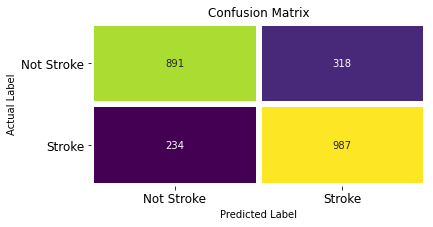

-------------------------------------------
Accuracy of Logistic Regression: 77.28395061728395 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1209
           1       0.76      0.81      0.78      1221

    accuracy                           0.77      2430
   macro avg       0.77      0.77      0.77      2430
weighted avg       0.77      0.77      0.77      2430



In [27]:
# Here, I applied "Logistic Regression" and found "Confusion Matrix, Accuracy Score, Classification Report".

model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(Y_test, lr_predict)
lr_acc_score = accuracy_score(Y_test, lr_predict)

df1 = pd.DataFrame(columns = ["Not Stroke", "Stroke"], index = ["Not Stroke", "Stroke"], data = lr_conf_matrix )
f,ax = plt.subplots(figsize = (6, 3))
sns.heatmap(df1, annot = True, cmap = "viridis", fmt = '.0f', linewidths = 5, ax = ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test, lr_predict))

In [28]:
# Findout the minimum Kvalue at which maximum accuracy.

for K in range(1, 10):
    K_value = K + 1
    neighbor = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm = 'auto')
    neighbor.fit(X_train, Y_train) 
    y_pred = neighbor.predict(X_test)
    print( "Accuracy is ", accuracy_score(Y_test, y_pred)*100,"% for K-Value:",K_value)

Accuracy is  97.32510288065843 % for K-Value: 2
Accuracy is  94.81481481481482 % for K-Value: 3
Accuracy is  94.81481481481482 % for K-Value: 4
Accuracy is  92.88065843621399 % for K-Value: 5
Accuracy is  92.88065843621399 % for K-Value: 6
Accuracy is  90.98765432098766 % for K-Value: 7
Accuracy is  90.61728395061729 % for K-Value: 8
Accuracy is  89.25925925925927 % for K-Value: 9
Accuracy is  89.25925925925927 % for K-Value: 10


+ Here, I am getting highest accuracy with value of k = 2. That's why I will consider k = 2 for next tasks in K -NeighborsClassifier

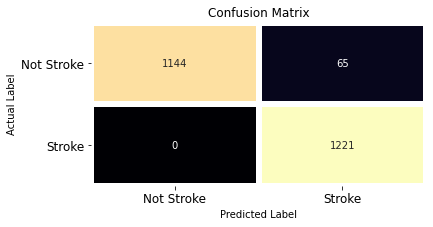

-------------------------------------------
Accuracy of K-NeighborsClassifier: 97.32510288065843 

-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1209
           1       0.95      1.00      0.97      1221

    accuracy                           0.97      2430
   macro avg       0.97      0.97      0.97      2430
weighted avg       0.97      0.97      0.97      2430



In [29]:
# Here, I applied "K-Neighbors Classifier" and found "Confusion Matrix, Accuracy Score, Classification Report".

model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(Y_test, knn_predicted)
knn_acc_score = accuracy_score(Y_test, knn_predicted)

df1 = pd.DataFrame(columns = ["Not Stroke", "Stroke"], index = ["Not Stroke", "Stroke"], data = knn_conf_matrix )
f,ax = plt.subplots(figsize = (6, 3))
sns.heatmap(df1, annot = True, cmap = "magma", fmt= '.0f', linewidths = 5, ax = ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test, knn_predicted))

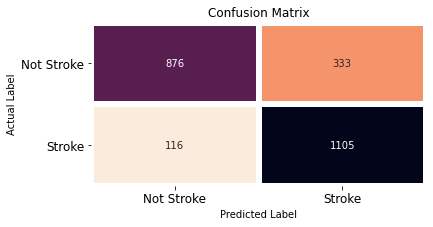

-------------------------------------------
Accuracy of Random Forest: 81.52263374485597 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.72      0.80      1209
           1       0.77      0.90      0.83      1221

    accuracy                           0.82      2430
   macro avg       0.83      0.81      0.81      2430
weighted avg       0.83      0.82      0.81      2430



In [30]:
# Here, I applied "Random Forest Classifier" and found "Confusion Matrix, Accuracy Score, classification_report".

model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators = 10, random_state = 101, max_depth = 5)
rf.fit(X_train, Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)

df1 = pd.DataFrame(columns = ["Not Stroke", "Stroke"], index = ["Not Stroke", "Stroke"], data = rf_conf_matrix )
f,ax = plt.subplots(figsize = (6, 3))
sns.heatmap(df1, annot = True, cmap = "rocket_r", fmt = '.0f', linewidths = 5, ax = ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test, rf_predicted))

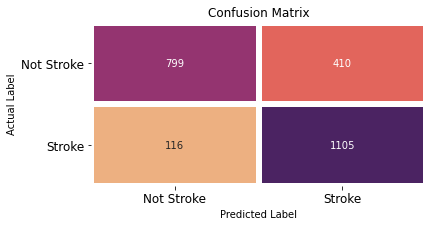

-------------------------------------------
Accuracy of DecisionTreeClassifier: 78.35390946502058 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1209
           1       0.73      0.90      0.81      1221

    accuracy                           0.78      2430
   macro avg       0.80      0.78      0.78      2430
weighted avg       0.80      0.78      0.78      2430



In [31]:
# Here, I applied "Decision Tree Classifier" and found "Confusion Matrix, Accuracy Score, classification_report".

model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 5)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)

df1 = pd.DataFrame(columns = ["Not Stroke", "Stroke"], index= ["Not Stroke", "Stroke"], data= dt_conf_matrix )
f,ax = plt.subplots(figsize = (6, 3))
sns.heatmap(df1, annot = True, cmap = "flare", fmt = '.0f', linewidths = 5, ax = ax, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(Y_test,dt_predicted))

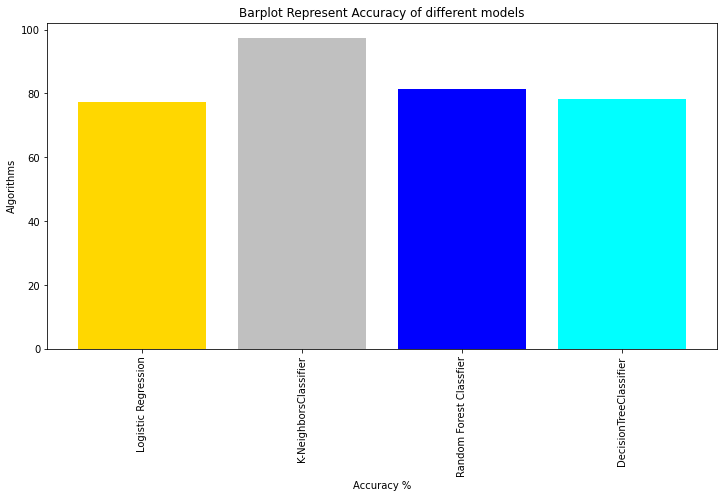

In [32]:
# Here, I have created a barplot on accuracy score for each models.

model_ev = {'Model' : ['Logistic Regression', 'K-NeighborsClassifier', 'Random Forest Classfier', 'DecisionTreeClassifier'], 
            'Accuracy' : [lr_acc_score*100, knn_acc_score*100, rf_acc_score*100, dt_acc_score*100]}
colors = ['gold', 'silver', 'blue', 'cyan']
plt.figure(figsize = (12, 6))
plt.title("Barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation = 90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color = colors)
plt.show()

##### This target feature is imbalanced. I did not know about it after applying machine learning models. I saw every models are showing only 'True Negative' and 'False Negative' values in classification report and all models are showing more than 90%  of accuracy. Then I understood my feature is not balanced. After that for making it balanced I used 'Random Over Sampler' method for 'over sampling' the data and I applied it because I didn't want to loose any data that's why I didn't use 'under sampling'. After applying this again I fit the data into models. Here, I used four models for which one of them is giving higher  accuracy and f1-score.
#####  My first reason to choose "K-Neighbors Classifier" is "K-Neighbors Classifier" is simple and easy to implement. There’s no need to tune several parameters, or make additional assumptions and it is versatile. It can be used for classification, regression.  My second reason for choosing it is that here, I saw "K-Neighbors Classifier" is giving more than 97% of accuracy and f1-score with the k value of 2. Here, "Random Forest Classfier" is giving more than 80% and others are giving lees than 80%. That's why I have chosen "K-Neighbors Classifier" for predicting on stroke.